**Health Insurance Cost Prediction**

  Predicting health insurance costs accurately is important for several reasons.

*   Firstly, it helps insurance companies to determine the premium that they should charge their customers.

*  Secondly, it helps customers to make informed decisions about their health insurance plans.

*  Thirdly, it helps policy makers to design policies that are more effective in providing affordable health care to the population



**Features used:**

*  age
*  gender
*  BMI
*  Children
*  smoking_status
*  location
*  health_insurance_price




age,BMI,Children,health_insurance_price are the numerical features

gender,smoking_status,location are the categorical features

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [246]:
df=pd.read_csv("/content/Health_insurance_cost.csv")
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [247]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [248]:
df.describe()


,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [249]:
df.shape

(1338, 7)

In [250]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

**Handling the Missing values**

In [251]:
#Using univariate imputation techniques



# Replace null values in 'BMI' with the mean value
mean_bmi = df['BMI'].mean()
df['BMI'].fillna(mean_bmi, inplace=True)

# Replace null values in 'age' with the mean value
mean_age=df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

## Replace null values in 'health_insurance_price' with the mode value
mode_price=df['health_insurance_price'].mode()[0]
#print(df['health_insurance_price'].mode())
df['health_insurance_price'].fillna(mode_price, inplace=True)


df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1338 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


**Converting categorical variable to numerical variables**

In [252]:
##Converting objects labels into categorical
df[['gender', 'smoking_status', 'location']] = df[['gender', 'smoking_status', 'location']].astype('category')
df.dtypes

age                        float64
gender                    category
BMI                        float64
Children                     int64
smoking_status            category
location                  category
health_insurance_price     float64
dtype: object

In [253]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.gender.drop_duplicates())
df.gender = label.transform(df.gender)
'''label.fit(df.smoking_status.drop_duplicates())
df.smoking_status = label.transform(df.smoking_status)'''
label.fit(df.location.drop_duplicates())
df.location = label.transform(df.location)
df.dtypes
df.head()


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.638217,0,yes,3,16884.92400
1,18.0,1,33.770000,1,no,2,1725.55230
2,28.0,1,33.000000,3,no,2,4449.46200
3,33.0,1,22.705000,0,no,1,21984.47061
4,32.0,1,28.880000,0,no,1,3866.85520


Text(0.5, 1.0, 'Distrbution of Health_insurance_price')

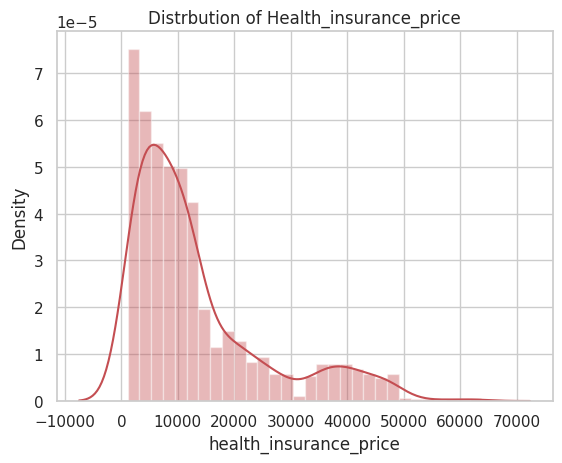

In [254]:
sns.set(style="whitegrid")
#f, a = plt.subplots(1,1, figsize=(12, 8))
ax=sns.distplot(df['health_insurance_price'],kde=True,color='r')
plt.title("Distrbution of Health_insurance_price")
#plt.show()

This distribution is right-skewed. To make it closer to normal we can apply natural log

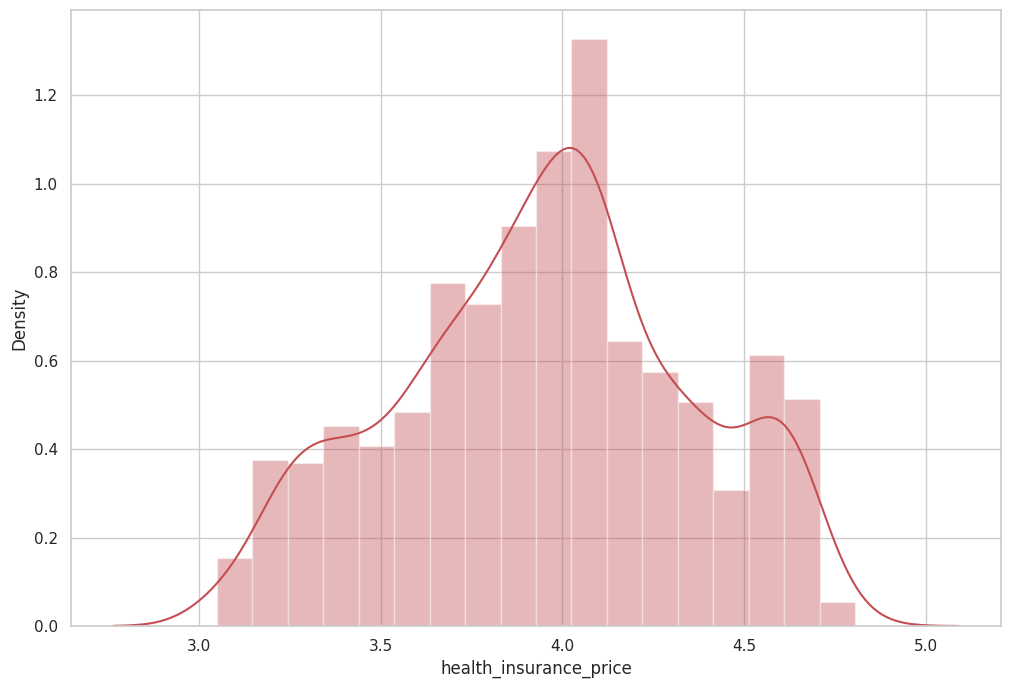

In [255]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['health_insurance_price']), kde = True, color = 'r' )

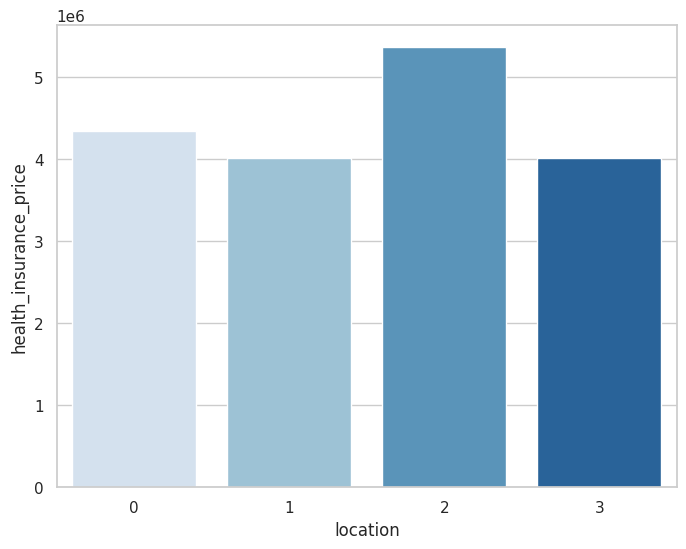

In [256]:
health_insurance_price = df['health_insurance_price'].groupby(df.location).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(health_insurance_price.head(), palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest and Northwest. Taking into account certain factors (gender, smoking, having children) let's see how it changes by location

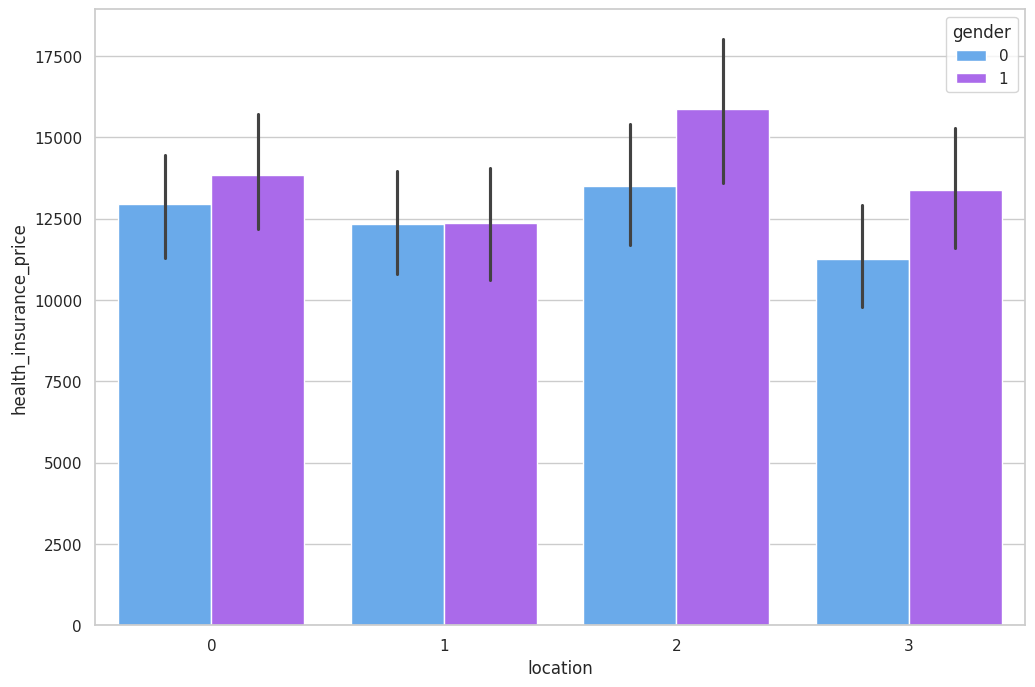

In [257]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='location', y='health_insurance_price', hue='gender', data=df, palette='cool')

X-axis :  0-North east,
           1-North west,2-South east,3-South west


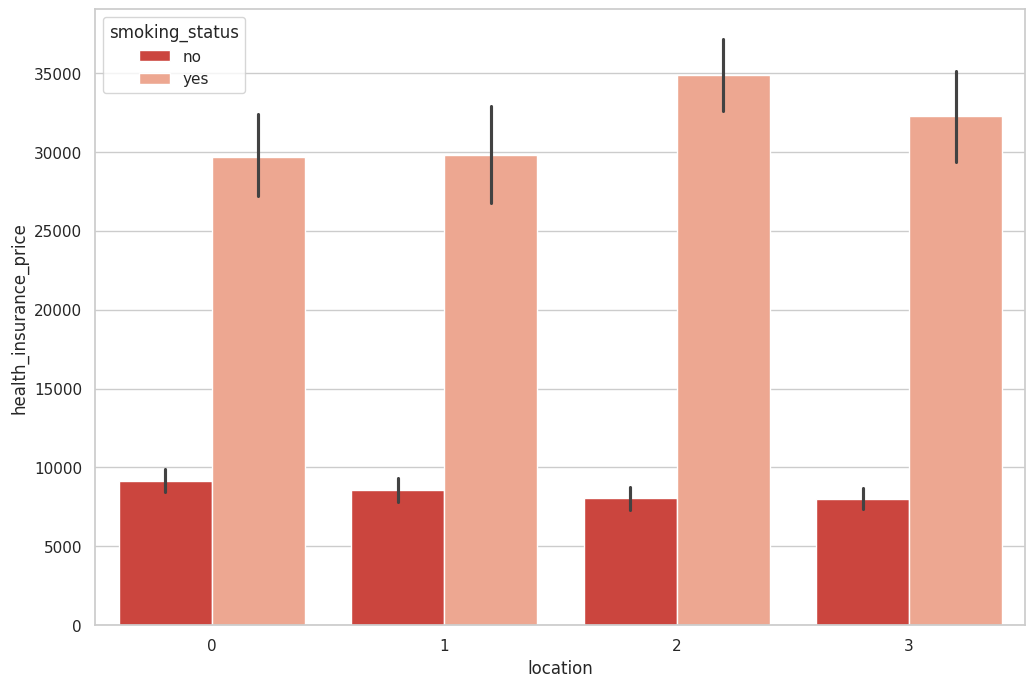

In [258]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'location', y = 'health_insurance_price',
                 hue='smoking_status', data=df, palette='Reds_r')

Bars :  Dark red:Non Smoking,  Light red:Smoking

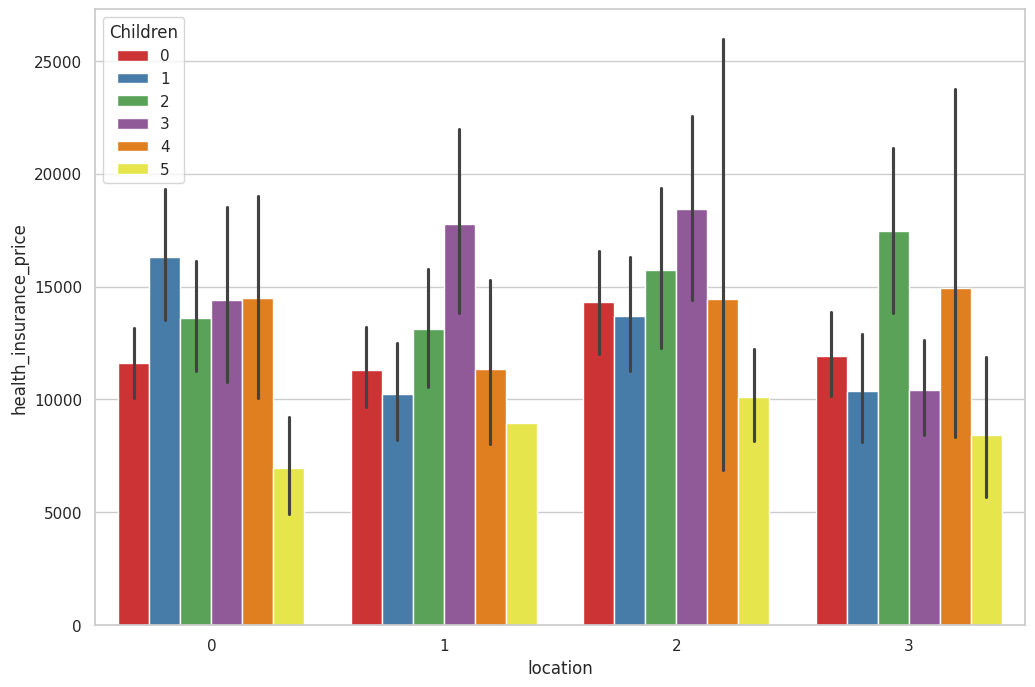

In [259]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='location', y='health_insurance_price', hue='Children', data=df, palette='Set1')


As we can see from these barplots...


*   the highest charges due to smoking are more  in the Southeast but the lowest are in the Northeast.

*   People in the Southwest generally smoke more than people in the
Northeast

*  people in the Northeast have higher charges by gender than in the Southwest and Northwest overall.

*  people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

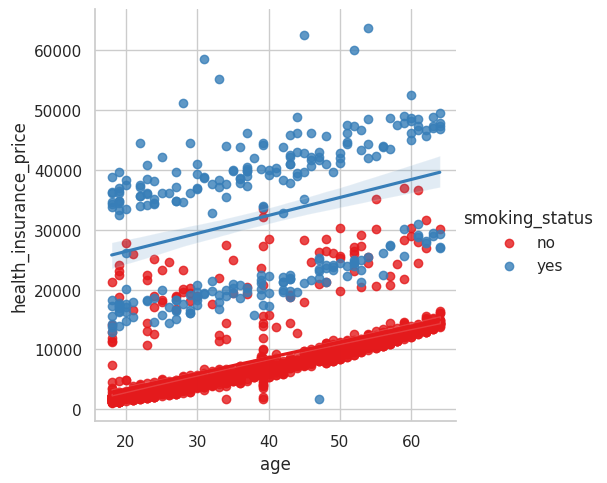

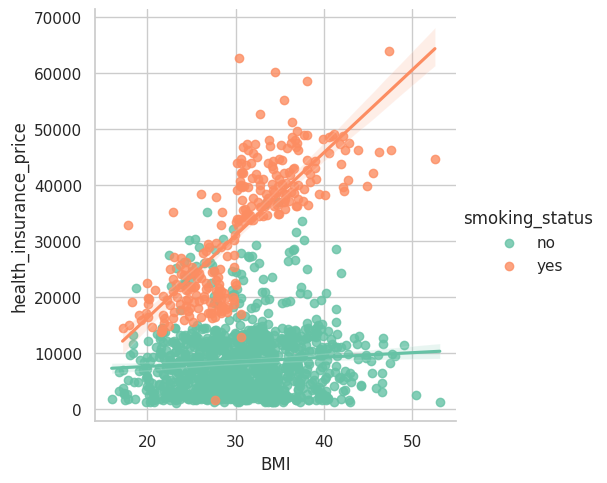

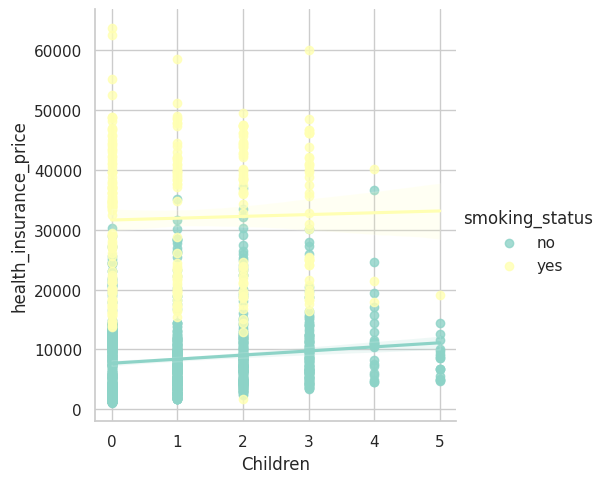

In [260]:
ax = sns.lmplot(x = 'age', y = 'health_insurance_price', data=df, hue='smoking_status', palette='Set1')
ax = sns.lmplot(x = 'BMI', y = 'health_insurance_price', data=df, hue='smoking_status', palette='Set2')
ax = sns.lmplot(x = 'Children', y = 'health_insurance_price', data=df, hue='smoking_status', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

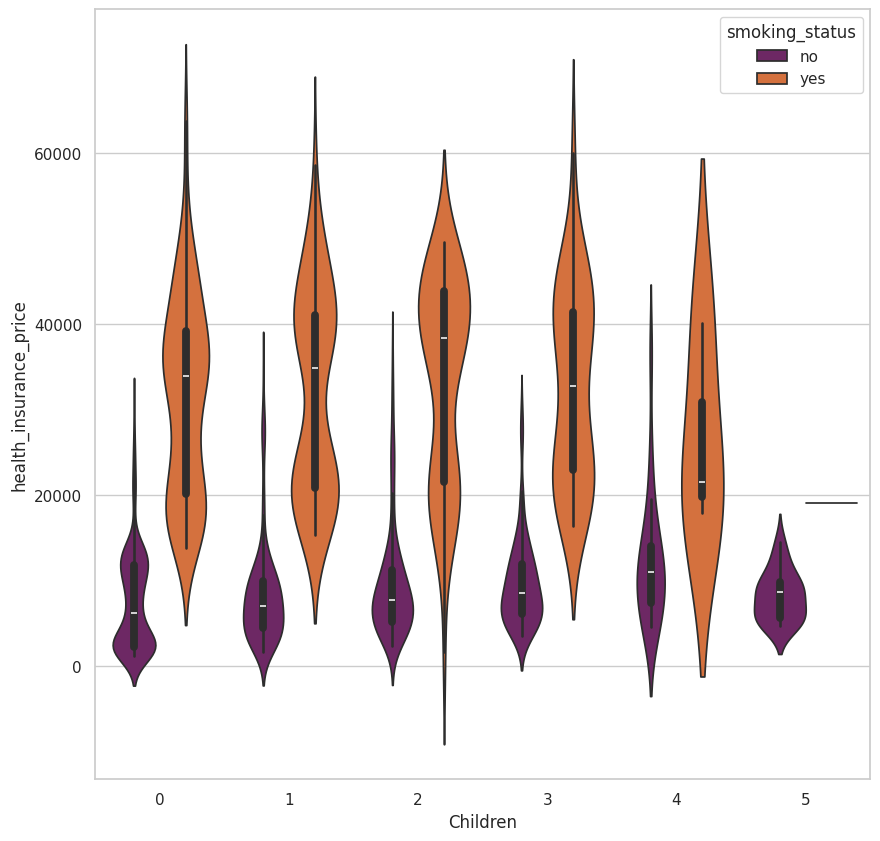

In [261]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'Children', y = 'health_insurance_price', data=df,
                 orient='v', hue='smoking_status', palette='inferno')

Feature importance ranking


1.smoking_status(0.596107)
2.BMI(0.218776)
3.age(0.138005)
4.Children(0.022864)
5.location(0.016982)
6.gender(0.007267)


<BarContainer object of 6 artists>

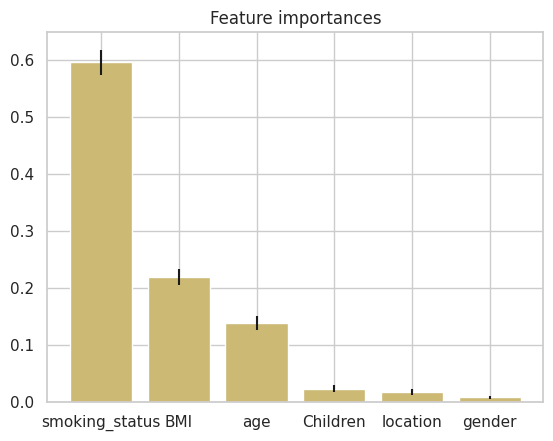

In [262]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'gender', 'BMI', 'Children','smoking_status', 'location']
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],color="y", yerr=std[indices], align="center")

Hypothesis Testing

Objective #1:

     Are medical claims made by smokers greater than those who don't smoke?

H 0 :  μ1≤μ2 The average charges of smokers ismless than or equal to non smokers

H a:μ1>μ2 The average charges of smokers is greater then nonsmokers



Where:

μ1
  = Claims by smokers

μ2
  = Claims by non-smokers

α
  = 0.05     (95% Confidence Interval)

In [263]:
Smoker=df.loc[df.smoking_status=='yes']
Smoker.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.638217,0,yes,3,16884.9240
11,62.0,0,26.290000,0,yes,2,27808.7251
14,27.0,1,42.130000,0,yes,2,39611.7577
19,30.0,1,35.300000,0,yes,3,36837.4670
23,34.0,0,31.920000,1,yes,0,37701.8768


In [264]:
df['smoking_status'].value_counts()

no     1064
yes     274
Name: smoking_status, dtype: int64

In [265]:
Smoker.count()

age                       274
gender                    274
BMI                       274
Children                  274
smoking_status            274
location                  274
health_insurance_price    274
dtype: int64

In [266]:
NonSmoker=df.loc[df.smoking_status=='no']
print(NonSmoker.head())
NonSmoker.count()

    age  gender     BMI  Children smoking_status  location  \
1  18.0       1  33.770         1             no         2   
2  28.0       1  33.000         3             no         2   
3  33.0       1  22.705         0             no         1   
4  32.0       1  28.880         0             no         1   
5  31.0       0  25.740         0             no         2   

   health_insurance_price  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520  
5              3756.62160  


age                       1064
gender                    1064
BMI                       1064
Children                  1064
smoking_status            1064
location                  1064
health_insurance_price    1064
dtype: int64

In [267]:
# Adjusting the size of the rows to be equal
NonSmoker = NonSmoker[-274:]
charges_yes = Smoker.health_insurance_price
charges_no = NonSmoker.health_insurance_price

In [268]:
print('Average Cost charged to Insurance for smoker is {} and nonsmoker is {} '.format(charges_yes.mean(),charges_no.mean()))

Average Cost charged to Insurance for smoker is 31966.669293394163 and nonsmoker is 8430.677172919708 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

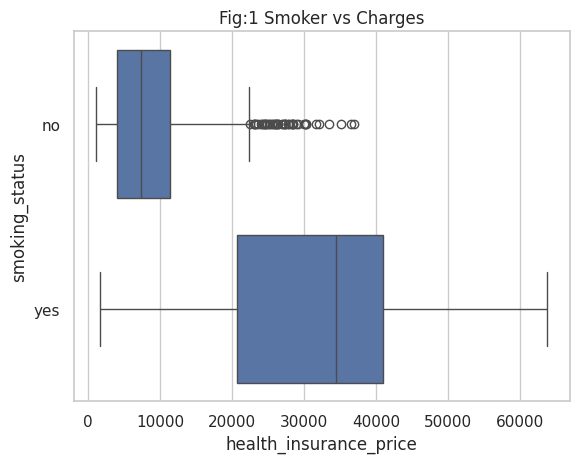

In [269]:
#smoker vs charges
sns.boxplot(x=df.health_insurance_price,y=df.smoking_status,data=df).set(title="Fig:1 Smoker vs Charges")

In [270]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 29.784791923473808 , Pvalue =1.6753925150019694e-116 , OnetailPvalue = 8.376962575009847e-117


In [271]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 8.376962575009847e-117 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


We reject the null hypothesis and can conclude that people who smoke have on an average have larger medical claim compared to people who don't smoke.

In [272]:
label.fit(df.smoking_status.drop_duplicates())
df.smoking_status = label.transform(df.smoking_status)

**Store Feature Matrix in X and Response(Target) in Vector y**

In [273]:
X = df.drop(['health_insurance_price'], axis = 1)
X

,age,gender,BMI,Children,smoking_status,location
0,19.0,0,30.638217,0,1,3
1,18.0,1,33.770000,1,0,2
2,28.0,1,33.000000,3,0,2
3,33.0,1,22.705000,0,0,1
4,32.0,1,28.880000,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970000,3,0,1
1334,18.0,0,31.920000,0,0,0
1335,18.0,0,36.850000,0,0,2
1336,21.0,0,25.800000,0,0,3


In [274]:
y=df['health_insurance_price']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1338, dtype: float64

1.split the data into two part:a training set and a testing set
2.Train the model(s) on training set
3.Test the Model(s) on Testing set

In [275]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train)
print(y_train)

       age  gender     BMI  Children  smoking_status  location
310   50.0       1  26.600         0               0         3
668   62.0       1  32.015         0               1         0
1150  18.0       0  30.305         0               0         0
897   19.0       1  25.555         1               0         1
679   49.0       0  23.180         2               0         1
...    ...     ...     ...       ...             ...       ...
588   61.0       0  35.910         0               0         0
117   29.0       0  27.940         1               1         2
428   21.0       0  16.815         1               0         0
104   34.0       0  27.500         1               0         3
36    62.0       0  32.965         3               0         1

[1070 rows x 6 columns]
310      8444.47400
668     45710.20785
1150     2203.73595
897      2221.56445
679     10156.78320
           ...     
588     13635.63790
117     19107.77960
428      3167.45585
104      5003.85300
36      15612.19335

**IMPORT THE MODELS**

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

**Model Trainig**

In [277]:
lr=LinearRegression()               #LinearRegression
lr.fit(X_train,y_train)
svm=SVR()                           #Support Vector Regression
svm.fit(X_train,y_train)
rf=RandomForestRegressor()           #RandomForestRegressor
rf.fit(X_train,y_train)
gr=GradientBoostingRegressor()        #GradientBoostingRegressor
gr.fit(X_train,y_train)


GradientBoostingRegressor()

**Prediction on Test Data**

In [278]:
import pandas as pd
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})
df1


,Actual,lr,svm,rf,gr
67,6389.37785,7370.445730,9474.482280,6778.627833,7309.089435
284,9625.92000,10886.777952,9555.749484,12561.229847,11222.058909
325,6600.20595,10344.204745,9478.750928,7789.114708,8160.705018
1266,10704.47000,11406.426124,9572.606180,11357.605820,11795.820107
225,11987.16820,14411.035585,9574.020081,13661.056207,13447.155501
...,...,...,...,...,...
973,1759.33800,5714.436091,9384.458595,2084.273079,1451.776632
151,7789.63500,9710.900999,9529.809194,13177.131638,12309.584204
707,10264.44210,11458.203396,9535.732819,10591.762058,10977.441461
1118,38282.74950,32257.713593,9436.115489,44235.256345,40751.657575


**Comparing the Performance Visually**

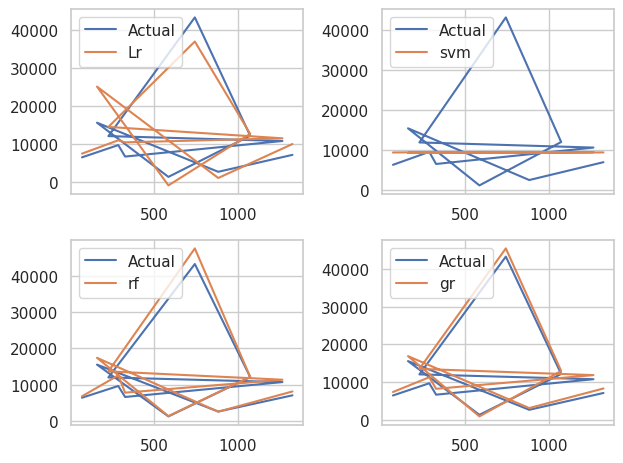

In [279]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.legend()

plt.tight_layout()

**Evaluating the Algorithm**

In [297]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [296]:
print(score1,score2,score3,score4)

0.7690231895069782 -0.08371583669164129 0.8453154767309186 0.8546323666352282


**Another Matrix for model evaluation**

In [282]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

print(s1,s2,s3,s4)

4088.569006733833 8231.781609841963 2433.8478576659836 2437.896473890281


By r2_score and mean absolute error ,we can say model 3 ie..Gradient Boosting Regressor is the best model

**Predict charges for new Customer**

In [290]:
data={'age':40,'gender':1,'BMI':40.30,'Children':4,'smoking_status':1,'location':2}
df2=pd.DataFrame(data,index=[0])
df2

,age,gender,BMI,Children,smoking_status,location
0,40,1,40.3,4,1,2


In [291]:
new_pred=gr.predict(df2)
print(new_pred)

[42259.29352107]


**Save Model Using Joblib**

In [292]:
gr=GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [293]:
import joblib
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [295]:
model=joblib.load('model_joblib_gr')
model.predict(df2)

array([42259.29352107])

Conclusion: like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Gradient Boosting Regressor turned out to be the best model